<a href="https://colab.research.google.com/github/Bharat-Moorthy/MLAI---Paathsalaassignments/blob/main/nc160_HC_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

HC clustering without pca technique


In [2]:
data = pd.read_csv("NCI60_X.csv")

In [3]:
data.shape

(64, 6831)

In [4]:
data.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [5]:
data=data.drop("Unnamed: 0",axis=1)

In [6]:
data

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
60,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
61,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
62,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [7]:
data_copy =data

In [8]:
data_copy

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
60,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
61,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
62,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [55]:
HC_cluster = linkage(data_copy, method = "ward", metric='euclidean')

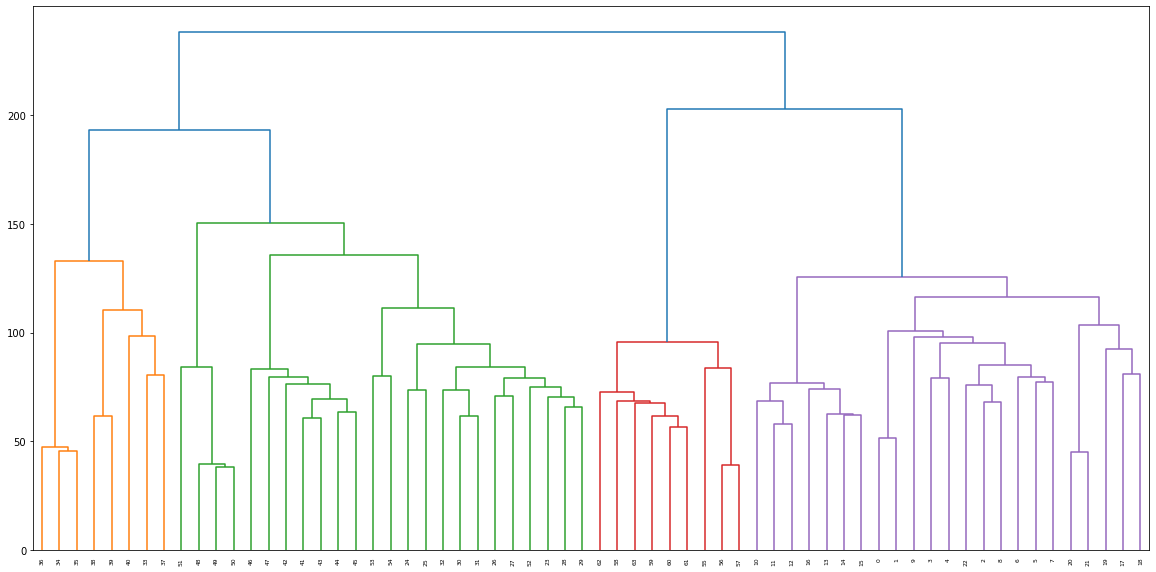

In [56]:
plt.figure(figsize=(20,10))
dendrogram(HC_cluster)
plt.show()

In [57]:
labels = fcluster(HC_cluster,t=90,criterion='distance')

In [58]:
data_copy['hc_clusters'] = labels

In [62]:
data_copy['hc_clusters']

0     13
1     13
2     15
3     14
4     14
      ..
59    10
60    10
61    10
62    10
63    10
Name: hc_clusters, Length: 64, dtype: int32

In [59]:
data_copy["hc_clusters"].unique()

array([13, 15, 14, 16, 12, 18, 19, 17,  9,  8,  3,  1,  2,  4,  6,  5,  7,
       11, 10], dtype=int32)

In [75]:
data_copy["hc_clusters"].nunique()

19

In [76]:
#The unique values/labels without applying PCA are 19 

APPLYING PCA TECHNIQUE WITH 50 COMPONENTS AND USING HC TECHNIQUE

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
data_duplicate =data

In [20]:
data_duplicate

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,hc_clusters
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,12
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,12
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,14
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,6
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000,9
60,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000,9
61,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000,9
62,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000,9


In [21]:
data_duplicate.describe()

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,hc_clusters
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514,8.890625
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312,4.711072
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000,1.000000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.177500,-0.327500,-0.328750,-0.232519,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000,14.000000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000,14.000000


In [22]:
data_duplicate.corr()

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,hc_clusters
1,1.000000,0.369523,0.224803,0.072525,-0.111652,0.082434,0.102550,0.383263,0.146702,0.200520,...,-0.110626,-0.104605,-0.175310,-0.201395,-0.039783,-0.036840,-0.007935,-0.082233,-0.068994,0.159686
2,0.369523,1.000000,0.365087,0.234746,0.156462,0.190006,0.347300,0.046215,0.259777,0.043624,...,-0.100822,-0.036153,0.002595,0.016097,-0.048616,0.007148,-0.083373,-0.042292,-0.046844,0.062656
3,0.224803,0.365087,1.000000,0.234463,0.105175,0.025614,0.101811,0.008317,-0.044394,0.223556,...,0.026336,0.078713,0.051154,0.075279,-0.125612,-0.035144,0.116060,0.095782,0.080308,-0.027093
4,0.072525,0.234746,0.234463,1.000000,0.139227,0.072153,0.050299,-0.117858,0.032301,-0.157428,...,-0.237242,-0.193870,-0.230741,-0.081435,-0.196066,0.007615,-0.050696,-0.042771,0.010048,-0.117058
5,-0.111652,0.156462,0.105175,0.139227,1.000000,0.252648,0.249501,-0.071547,-0.044091,-0.150494,...,-0.202877,-0.146788,-0.080164,-0.119049,0.091374,0.069646,-0.025194,0.028185,-0.048320,0.233994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,-0.036840,0.007148,-0.035144,0.007615,0.069646,-0.290953,0.105614,0.085815,0.016968,0.048932,...,0.438254,0.476920,0.344669,0.408825,0.802684,1.000000,0.422170,0.386220,0.329532,-0.010380
6828,-0.007935,-0.083373,0.116060,-0.050696,-0.025194,-0.223602,0.046420,0.175311,-0.061362,0.123515,...,0.342030,0.372787,0.327562,0.319074,0.450702,0.422170,1.000000,0.433611,0.304976,-0.100901
6829,-0.082233,-0.042292,0.095782,-0.042771,0.028185,-0.223896,-0.096546,0.033388,0.015082,0.195558,...,0.162107,0.298043,0.189013,0.387155,0.372070,0.386220,0.433611,1.000000,0.737903,-0.435487
6830,-0.068994,-0.046844,0.080308,0.010048,-0.048320,-0.217493,-0.193918,0.014713,0.026882,0.226114,...,0.238606,0.287673,0.254872,0.361875,0.295309,0.329532,0.304976,0.737903,1.000000,-0.417850


There are also some other variables with have correlation above 0.5

So there is a good correlation among variables - PCA can be applied

Scaling to be done to apply the PCA and clustering alogorithm

Standard scaler to be applied

In [38]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_duplicate)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,hc_clusters
0,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,...,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675,0.665232
1,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,...,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446,0.665232
2,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,...,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838,1.093120
3,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,...,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408,-0.618432
4,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,...,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992,-0.618432


In [39]:
data_scaled.describe()

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,hc_clusters
count,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,...,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
mean,2.775558e-17,-1.387779e-17,0.000000,3.122502e-17,-1.040834e-17,0.000000,2.775558e-17,2.775558e-17,1.734723e-17,-2.775558e-17,...,2.775558e-17,-1.387779e-17,5.204170e-17,6.938894e-18,5.551115e-17,0.000000,2.775558e-17,-6.938894e-18,6.938894e-18,6.938894e-18
std,1.007905e+00,1.007905e+00,1.007905,1.007905e+00,1.007905e+00,1.007905,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,...,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00
min,-2.377270e+00,-2.877193e+00,-3.931262,-2.105826e+00,-1.768435e+00,-2.032645,-2.555051e+00,-2.029547e+00,-2.115392e+00,-2.630141e+00,...,-1.048700e+00,-1.298802e+00,-2.569869e+00,-2.344267e+00,-1.617887e+00,-1.767830,-2.014441e+00,-1.850851e+00,-1.985687e+00,-1.688151e+00
25%,-8.071713e-01,-5.018980e-01,-0.401395,-9.173725e-01,-5.217310e-01,-0.468724,-7.230938e-01,-5.412910e-01,-8.472563e-01,-7.803041e-01,...,-5.165919e-01,-5.595580e-01,-5.668481e-01,-5.245635e-01,-5.274250e-01,-0.577904,-7.115609e-01,-7.206783e-01,-8.304080e-01,-1.046320e+00
50%,4.353664e-02,3.701052e-02,0.046342,3.033881e-01,-5.421676e-02,-0.019322,-5.352873e-02,6.883255e-02,-1.832542e-03,-3.022115e-02,...,-3.585180e-01,-2.652086e-01,-1.940283e-01,-1.590203e-01,-1.675724e-01,-0.075668,1.623610e-01,-2.312333e-01,-9.583766e-02,2.340012e-02
75%,7.515195e-01,5.060775e-01,0.424308,9.426144e-01,3.821298e-01,0.512757,6.194484e-01,5.451041e-01,6.909453e-01,7.042364e-01,...,1.401940e-01,1.145247e-01,2.907792e-01,3.165084e-01,1.868279e-01,0.036861,5.497099e-01,5.719101e-01,7.389014e-01,1.093120e+00
max,2.190290e+00,3.017748e+00,2.721339,1.687994e+00,3.509280e+00,3.317043,2.502375e+00,2.226625e+00,2.323083e+00,2.310550e+00,...,4.272379e+00,4.687052e+00,4.336512e+00,4.400030e+00,4.848555e+00,4.375607,3.440368e+00,3.381761e+00,2.535260e+00,1.093120e+00


In [40]:
#After applying the scaling , we can se the difference in statistical summary

In [41]:
pca = PCA(n_components=50)
data_decomposed= pca.fit_transform(data_scaled)

In [42]:
data_decomposed.shape

(64, 50)

In [43]:
pca_data=pd.DataFrame(data_decomposed)

In [44]:
pca_data.corr()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000e+00,-2.077527e-17,2.693839e-16,2.854029e-17,4.615483e-17,2.281180e-16,1.861069e-16,-5.294914e-18,-8.109501e-17,1.876846e-17,...,3.581266e-17,9.335842e-17,8.976574e-17,-1.705415e-17,1.105230e-16,-1.462264e-16,-6.878023e-18,-8.545812e-17,-3.734887e-17,-1.281739e-16
1,-2.077527e-17,1.000000e+00,-5.997006e-17,-2.730743e-17,-5.047888e-17,1.104577e-16,2.142430e-16,8.088389e-17,3.931969e-17,4.543968e-17,...,-8.596532e-17,-2.815949e-17,1.018728e-16,2.949229e-18,-1.039832e-17,1.384786e-16,2.657257e-17,9.333821e-18,4.687883e-17,0.000000e+00
2,2.693839e-16,-5.997006e-17,1.000000e+00,4.549829e-16,7.691071e-17,-1.093789e-16,2.859817e-16,-1.995087e-16,1.587357e-17,1.086057e-16,...,-3.493758e-17,-7.629624e-18,-4.928885e-17,-1.218587e-17,4.246156e-17,-1.092969e-16,-3.136994e-17,1.211782e-17,1.342125e-16,-6.406460e-17
3,2.854029e-17,-2.730743e-17,4.549829e-16,1.000000e+00,-4.736386e-16,-1.848069e-16,-3.584582e-16,1.384559e-16,-8.808139e-17,1.795950e-16,...,3.562864e-17,-7.546642e-18,1.101239e-17,-1.462208e-16,-3.137979e-17,-9.159299e-17,5.607317e-17,5.321670e-17,-7.587282e-17,1.068640e-17
4,4.615483e-17,-5.047888e-17,7.691071e-17,-4.736386e-16,1.000000e+00,-5.486026e-16,-1.477986e-16,1.197239e-16,-1.150564e-16,8.935427e-17,...,2.144600e-17,-1.242742e-16,1.778777e-16,-1.190619e-16,2.434987e-17,7.110957e-17,-2.875127e-17,-6.322684e-17,-5.911052e-17,3.229059e-17
5,2.281180e-16,1.104577e-16,-1.093789e-16,-1.848069e-16,-5.486026e-16,1.000000e+00,1.341765e-16,9.566446e-17,1.087987e-17,2.017934e-16,...,-1.150976e-16,-6.156490e-17,-1.441740e-17,-5.339651e-17,-2.689487e-17,7.815683e-17,-9.090378e-17,5.765890e-17,-6.832724e-17,9.042208e-17
6,1.861069e-16,2.142430e-16,2.859817e-16,-3.584582e-16,-1.477986e-16,1.341765e-16,1.000000e+00,1.075888e-17,-6.069187e-17,-7.225794e-18,...,1.090673e-16,3.343505e-17,1.511978e-17,-1.203728e-17,7.936972e-17,1.608476e-16,-9.718779e-17,-3.232387e-17,-1.577072e-16,-1.197731e-18
7,-5.294914e-18,8.088389e-17,-1.995087e-16,1.384559e-16,1.197239e-16,9.566446e-17,1.075888e-17,1.000000e+00,-3.426380e-16,-8.943136e-17,...,4.617519e-17,1.708103e-16,-2.134813e-16,2.315110e-16,-1.004124e-16,-3.902748e-16,-5.547389e-16,-3.638799e-17,1.220449e-16,-3.775305e-17
8,-8.109501e-17,3.931969e-17,1.587357e-17,-8.808139e-17,-1.150564e-16,1.087987e-17,-6.069187e-17,-3.426380e-16,1.000000e+00,-2.652277e-18,...,-9.064280e-17,2.991437e-17,-9.395052e-17,-7.922934e-17,-6.797747e-17,-1.592856e-16,-1.068652e-16,-2.049839e-17,-2.068627e-16,-8.078301e-17
9,1.876846e-17,4.543968e-17,1.086057e-16,1.795950e-16,8.935427e-17,2.017934e-16,-7.225794e-18,-8.943136e-17,-2.652277e-18,1.000000e+00,...,9.820413e-17,-1.472093e-16,-9.080525e-17,-1.690972e-16,-7.389858e-17,1.776813e-16,-6.017446e-17,2.623355e-18,1.185815e-16,-1.578625e-16


In [45]:
pca_data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-19.851089,-3.555111,-9.806780,-0.816126,12.609093,7.472348,14.174628,-3.256820,21.943319,-20.375389,...,3.496182,7.236753,5.039475,-3.449478,-5.022329,-0.044912,-5.827635,-1.274464,-15.297396,11.444807
1,-23.103125,-6.440927,-13.469626,5.642722,8.035277,3.715580,10.115627,-7.346682,22.339898,-13.126449,...,-1.682176,-0.319988,-0.883077,0.634833,2.632923,-14.805819,-4.932352,0.761556,12.299974,-3.940986
2,-27.474507,-2.461631,-3.527540,-1.335083,12.563927,17.345716,10.351132,-2.691831,-0.234449,-6.361662,...,-9.148835,2.586078,-2.147246,6.201030,-4.236937,31.112246,-0.478695,-11.826571,-11.532864,-4.644071
3,-42.779876,9.792516,-0.861443,3.477882,42.266945,27.241649,17.566557,-0.551344,14.258003,15.978699,...,-6.330124,11.181402,-4.446366,4.635197,4.476377,-13.009745,1.794636,-0.952717,7.438426,-8.134477
4,-55.377738,5.224760,-21.049801,15.903915,10.439691,12.994374,12.727274,32.548182,-7.879833,-10.177062,...,-3.614327,-7.636496,-2.773400,-5.521085,-9.741734,-7.260308,-6.073645,-4.173345,0.705007,4.472029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-17.980920,47.248565,5.383244,-17.408527,-0.294256,-7.429751,-15.512482,22.312350,-2.884818,22.377121,...,3.330290,-19.656373,3.441157,1.031113,-3.522796,2.452194,-0.886281,18.333034,-4.991869,-6.427289
60,-4.404030,42.312438,8.697516,-2.817731,5.717162,-3.376119,-11.904887,6.735100,1.846500,3.407442,...,2.855445,-4.105515,4.024407,-1.889210,0.738192,1.509715,1.963784,-10.240467,-6.371735,18.511113
61,-22.949468,36.115270,18.108565,-7.586604,5.874354,0.570350,-7.700837,-5.549003,-5.169780,13.448152,...,-2.215366,-4.699437,2.703551,-0.876689,1.815965,-3.190187,5.871034,-10.437862,16.461135,-8.369878
62,-19.158458,50.405922,4.198260,-3.044176,-8.347408,-3.660093,-2.006410,11.876694,-4.112470,-12.934196,...,1.461887,1.024842,-19.942673,6.114588,14.965259,2.974572,-4.417687,-4.614576,4.715852,-6.527050


In [46]:
pca.explained_variance_ratio_ *100 

array([11.36415376,  6.75550141,  5.75149841,  4.24734541,  3.73442732,
        3.61810158,  3.06678515,  2.68622248,  2.52914731,  2.37552632,
        2.3562246 ,  2.16398182,  2.04879869,  1.97868779,  1.91622623,
        1.77151937,  1.66249184,  1.61107913,  1.59426162,  1.55978234,
        1.50706397,  1.47988286,  1.43577328,  1.36272774,  1.32330816,
        1.27502438,  1.25888798,  1.20990332,  1.18082576,  1.12116222,
        1.08262571,  1.04457499,  1.02645951,  0.98813349,  0.97410566,
        0.93097016,  0.91465916,  0.89538085,  0.87252281,  0.84243779,
        0.81356291,  0.78897758,  0.73847115,  0.71927867,  0.70880028,
        0.69034228,  0.6783648 ,  0.64630553,  0.64053569,  0.60041266])

In [47]:
sum(pca.explained_variance_ratio_ *100)

94.54324392245364

In [63]:
PCA_HC = linkage(pca_data, method = "ward", metric='euclidean')

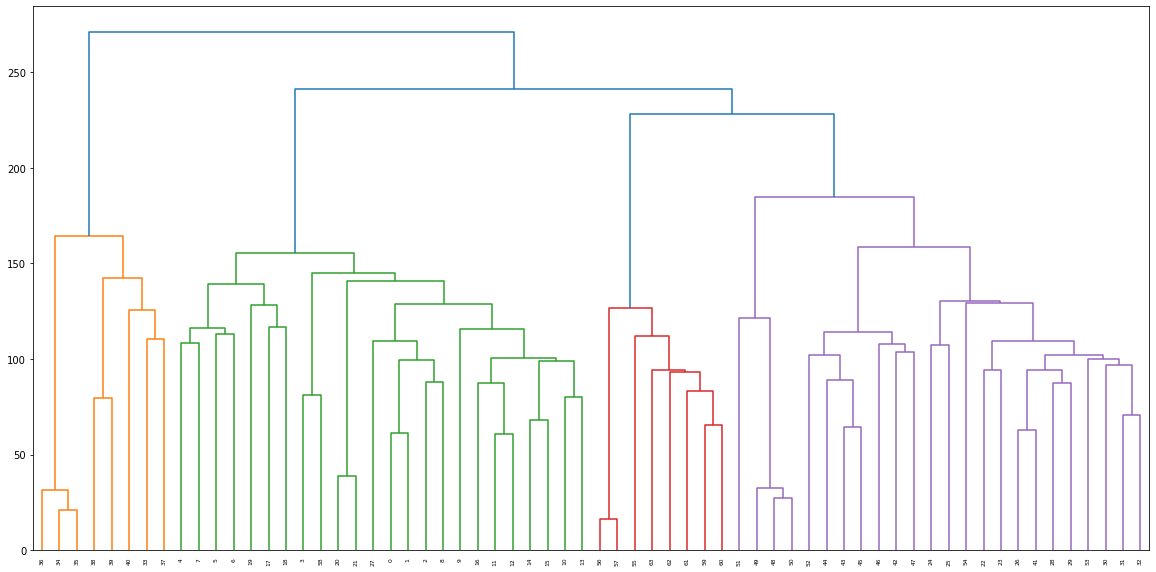

In [70]:
plt.figure(figsize=(20,10))
dendrogram(PCA_HC)
plt.show()

In [64]:
labels = fcluster(PCA_HC, t=90, criterion='distance')

In [65]:
labels


array([15, 15, 16, 13,  6,  8,  9,  7, 16, 21, 20, 18, 18, 20, 19, 19, 18,
       10, 11, 12, 14, 14, 36, 37, 34, 35, 38, 17, 39, 39, 41, 40, 40,  3,
        1,  1,  1,  4,  2,  2,  5, 38, 31, 29, 29, 29, 33, 32, 27, 27, 27,
       28, 30, 42, 43, 26, 22, 22, 13, 23, 23, 23, 24, 25], dtype=int32)

In [66]:
pca_data['hc_clusters'] = labels

In [67]:
pca_data

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,hc_clusters
0,-19.851089,-3.555111,-9.806780,-0.816126,12.609093,7.472348,14.174628,-3.256820,21.943319,-20.375389,...,7.236753,5.039475,-3.449478,-5.022329,-0.044912,-5.827635,-1.274464,-15.297396,11.444807,15
1,-23.103125,-6.440927,-13.469626,5.642722,8.035277,3.715580,10.115627,-7.346682,22.339898,-13.126449,...,-0.319988,-0.883077,0.634833,2.632923,-14.805819,-4.932352,0.761556,12.299974,-3.940986,15
2,-27.474507,-2.461631,-3.527540,-1.335083,12.563927,17.345716,10.351132,-2.691831,-0.234449,-6.361662,...,2.586078,-2.147246,6.201030,-4.236937,31.112246,-0.478695,-11.826571,-11.532864,-4.644071,16
3,-42.779876,9.792516,-0.861443,3.477882,42.266945,27.241649,17.566557,-0.551344,14.258003,15.978699,...,11.181402,-4.446366,4.635197,4.476377,-13.009745,1.794636,-0.952717,7.438426,-8.134477,13
4,-55.377738,5.224760,-21.049801,15.903915,10.439691,12.994374,12.727274,32.548182,-7.879833,-10.177062,...,-7.636496,-2.773400,-5.521085,-9.741734,-7.260308,-6.073645,-4.173345,0.705007,4.472029,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-17.980920,47.248565,5.383244,-17.408527,-0.294256,-7.429751,-15.512482,22.312350,-2.884818,22.377121,...,-19.656373,3.441157,1.031113,-3.522796,2.452194,-0.886281,18.333034,-4.991869,-6.427289,23
60,-4.404030,42.312438,8.697516,-2.817731,5.717162,-3.376119,-11.904887,6.735100,1.846500,3.407442,...,-4.105515,4.024407,-1.889210,0.738192,1.509715,1.963784,-10.240467,-6.371735,18.511113,23
61,-22.949468,36.115270,18.108565,-7.586604,5.874354,0.570350,-7.700837,-5.549003,-5.169780,13.448152,...,-4.699437,2.703551,-0.876689,1.815965,-3.190187,5.871034,-10.437862,16.461135,-8.369878,23
62,-19.158458,50.405922,4.198260,-3.044176,-8.347408,-3.660093,-2.006410,11.876694,-4.112470,-12.934196,...,1.024842,-19.942673,6.114588,14.965259,2.974572,-4.417687,-4.614576,4.715852,-6.527050,24


In [68]:
pca_data["hc_clusters"].unique()

array([15, 16, 13,  6,  8,  9,  7, 21, 20, 18, 19, 10, 11, 12, 14, 36, 37,
       34, 35, 38, 17, 39, 41, 40,  3,  1,  4,  2,  5, 31, 29, 33, 32, 27,
       28, 30, 42, 43, 26, 22, 23, 24, 25], dtype=int32)

In [73]:
pca_data["hc_clusters"].nunique()

43

In [77]:
#The unique values/labels with PCA is 43